<a href="https://colab.research.google.com/github/OlgaRv/Lesson_INT_AD/blob/main/Lesson_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи исследования

*	За какой период дата
*	Сколько уникальных клиентов/ категорий/ методов оплат/ статусов
*	Какой средний чек клиента
*	Распределение по статусам (сколько завершено/ отменено/ возвращено)
*	Динамика продаж (таблица + график)
*	Продажи по дню недели (график)
*	GMN по каждой категории (таблица + круговая диаграмма)
*	Доля отмен в каждой категории
*	На какие категории скидки
*	Рейтинг самых продаваемых товаров ТОП-10


# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/zerocoder/marketplace_dataframe.csv")

## Предобработка данных

In [ ]:
#  Удаление столбца 'Unnamed: 0', если он не нужен
df = df.drop(columns=['Unnamed: 0'])
# Преобразование столбцов к нужным типам данных
df['Дата создания'] = pd.to_datetime(df['Дата создания'], format="%d.%m.%Y")
df['Дата оплаты'] = pd.to_datetime(df['Дата оплаты'], format="%d.%m.%Y", errors='coerce')
# Удаление строк с пропущенными значениями
df.dropna()

,Unnamed: 0,ID товара,Статус,Дата создания,Артикул товара,Цена,Количество заказов,Итоговая сумма,ID транзакции,Категория,Сумма скидки,Метод оплаты,Дата оплаты,Дата начала обслуживания клиента,ID клиента
0,0,211131,завершен,01.07.2021,kreations_YI 06-L,1950,1,1950,100147443,Женская мода,0,наложенный платеж,01.07.2021,2021-7,1e4f1
1,1,211133,отменен,01.07.2021,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240,1,240,100147444,Красота и уход,0,наложенный платеж,01.07.2021,2021-7,1e4f2
2,2,211134,отменен,01.07.2021,Ego_UP0017-999-MR0,2450,1,2450,100147445,Женская мода,0,наложенный платеж,01.07.2021,2021-7,1e4f3
3,3,211135,завершен,01.07.2021,kcc_krone deal,360,1,60,100147446,Красота и уход,300,наложенный платеж,01.07.2021,2021-7,1e4f4
4,4,211136,заказ возвращен,01.07.2021,BK7010400AG,555,2,1110,100147447,Традиционные подарки,0,наложенный платеж,01.07.2021,2021-7,1e4f5


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# Период даты платежей
min_date = df['Дата создания'].min()
max_date = df['Дата создания'].max()
print(f"Период даты платежей: от {min_date} до {max_date}")

Период даты платежей: от 2021-07-01 00:00:00 до 2022-01-12 00:00:00


In [ ]:
# Уникальные значения
unique_clients = df['ID клиента'].nunique()
unique_categories = df['Категория'].nunique()
unique_payment_methods = df['Метод оплаты'].nunique()
unique_statuses = df['Статус'].nunique()
print(f"Уникальные клиенты: {unique_clients}")
print(f"Уникальные категории: {unique_categories}")
print(f"Уникальные методы оплаты: {unique_payment_methods}")
print(f"Уникальные статусы: {unique_statuses}")

Уникальные клиенты: 30952
Уникальные категории: 16
Уникальные методы оплаты: 10
Уникальные статусы: 9


In [ ]:
df['Метод оплаты'].unique()



array(['наложенный платеж', 'кредитная карта UBL', 'дебетовая карта Raif',
       'клиентский кредит', nan, 'мобильный банкинг MCB',
       'маркетинговые расходы', 'наличные при доставке',
       'товарный кредит', 'платежная система Payaxis', 'ваучер'],
      dtype=object)

In [ ]:
df = df.dropna()

In [ ]:
df['Статус'].unique()

array(['завершен', 'отменен', 'заказ возвращен', 'получен',
       'оформлен возврат', 'закрыт', 'мошенничество', 'на удержании',
       'обмен'], dtype=object)

In [ ]:
marketing_expenses = df[df['Метод оплаты'] == 'маркетинговые расходы']
marketing_expenses.describe()

,ID товара,Дата создания,Цена,Количество заказов,Итоговая сумма,ID транзакции,Дата оплаты
count,512.000000,512,512.000000,512.000000,512.000000,5.120000e+02,512
mean,243713.140625,2021-09-10 16:38:26.249999872,7139.730469,1.171875,14599.833984,1.001696e+08,2021-09-10 16:38:26.249999872
min,211486.000000,2021-07-01 00:00:00,1.000000,1.000000,1.000000,1.001477e+08,2021-07-01 00:00:00
25%,221762.500000,2021-08-01 18:00:00,415.000000,1.000000,706.000000,1.001552e+08,2021-08-01 18:00:00
50%,240837.500000,2021-09-13 12:00:00,1330.000000,1.000000,2558.000000,1.001674e+08,2021-09-13 12:00:00
75%,262767.250000,2021-10-13 12:00:00,5040.000000,1.000000,10280.000000,1.001829e+08,2021-10-13 12:00:00
max,295937.000000,2021-11-21 00:00:00,235000.000000,6.000000,535400.000000,1.002043e+08,2021-11-21 00:00:00
std,22352.976391,NaN,20549.015293,0.604735,50581.061905,1.516797e+04,NaN


In [ ]:
t_df = df[df['Метод оплаты'] == 'наложенный платеж']
t_df.describe()

,ID товара,Дата создания,Цена,Количество заказов,Итоговая сумма,ID транзакции,Дата оплаты
count,80369.000000,80369,80369.000000,80369.000000,80369.000000,8.036900e+04,80369
mean,291569.023405,2021-10-22 10:09:24.307133440,2394.808770,1.119486,3100.402618,1.002005e+08,2021-10-22 10:09:24.307133440
min,211131.000000,2021-07-01 00:00:00,0.000000,1.000000,0.000000,1.000013e+08,2021-07-01 00:00:00
25%,240420.000000,2021-09-11 00:00:00,260.000000,1.000000,330.000000,1.001672e+08,2021-09-11 00:00:00
50%,279669.000000,2021-11-14 00:00:00,495.000000,1.000000,750.000000,1.001939e+08,2021-11-14 00:00:00
75%,346387.000000,2021-11-26 00:00:00,1100.000000,1.000000,1949.000000,1.002360e+08,2021-11-26 00:00:00
max,387679.000000,2022-01-12 00:00:00,132000.000000,130.000000,111899.000000,1.002605e+08,2022-01-12 00:00:00
std,55192.246629,NaN,7359.319266,1.274440,8300.699623,3.534634e+04,NaN


In [26]:
df.query('Статус in ("завершен", "получен")')['Статус'].unique()

array(['завершен', 'получен'], dtype=object)

In [ ]:
# Средний чек клиента
average_order_value = df.groupby('ID клиента')['Итоговая сумма'].mean()
print(f"Средний чек клиента: {average_order_value.mean()}")

Средний чек клиента: 5044.424994461781


In [ ]:
# Средний чек клиента
average_value = df['Итоговая сумма'].mean()
print(f"Средний чек клиента: {average_value:.2f}")

Средний чек клиента: 5181.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140468 entries, 0 to 140467
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   ID товара                         140468 non-null  int64         
 1   Статус                            140468 non-null  object        
 2   Дата создания                     140224 non-null  datetime64[ns]
 3   Артикул товара                    140443 non-null  object        
 4   Цена                              140468 non-null  int64         
 5   Количество заказов                140468 non-null  int64         
 6   Итоговая сумма                    140468 non-null  int64         
 7   ID транзакции                     140468 non-null  int64         
 8   Категория                         140468 non-null  object        
 9   Сумма скидки                      140468 non-null  object        
 10  Метод оплаты                    

In [ ]:
print(df.isnull().sum())

ID товара                           0
Статус                              0
Дата создания                       0
Артикул товара                      0
Цена                                0
Количество заказов                  0
Итоговая сумма                      0
ID транзакции                       0
Категория                           0
Сумма скидки                        0
Метод оплаты                        0
Дата оплаты                         0
Дата начала обслуживания клиента    0
ID клиента                          0
dtype: int64


In [ ]:
# Распределение по статусам
status_distribution = df['Статус'].value_counts()
print("Распределение по статусам:")
print(status_distribution)

Распределение по статусам:
Статус
завершен            77810
отменен             41190
заказ возвращен     14732
получен              3059
оформлен возврат     2980
закрыт                213
мошенничество           7
на удержании            6
обмен                   4
Name: count, dtype: int64


Динамика продаж:
Дата создания
2021-07-01      900364
2021-07-02     1374269
2021-07-03     2205826
2021-07-04     1094080
2021-07-05      388951
                ...   
2022-01-08     3805495
2022-01-09     7498592
2022-01-10     5114376
2022-01-11    12931450
2022-01-12     3746533
Name: Итоговая сумма, Length: 194, dtype: int64


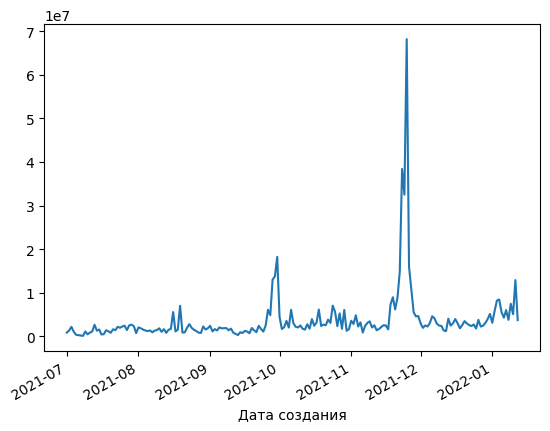

In [ ]:
# Динамика продаж
sales_dynamics = df.groupby('Дата создания')['Итоговая сумма'].sum()
print("Динамика продаж:")
print(sales_dynamics)

sales_dynamics.plot()
plt.show()

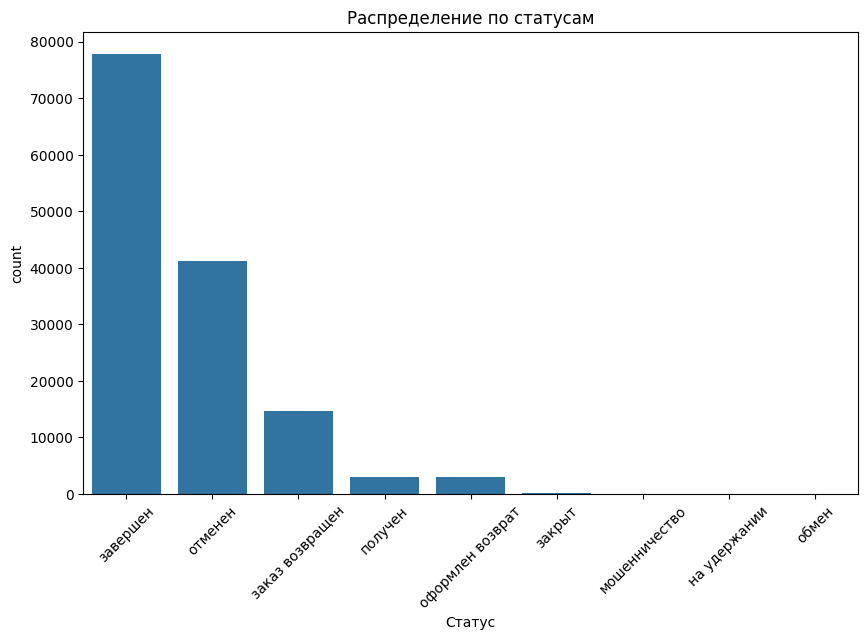

In [ ]:
# Визуализация распределения по статусам
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Статус')
plt.xticks(rotation=45)
plt.title("Распределение по статусам")
plt.show()

Продажи по дням недели:
День недели
Friday        89546040
Monday       100893638
Saturday      60142543
Sunday        85496805
Thursday     150570122
Tuesday      124259922
Wednesday    114474805
Name: Итоговая сумма, dtype: int64


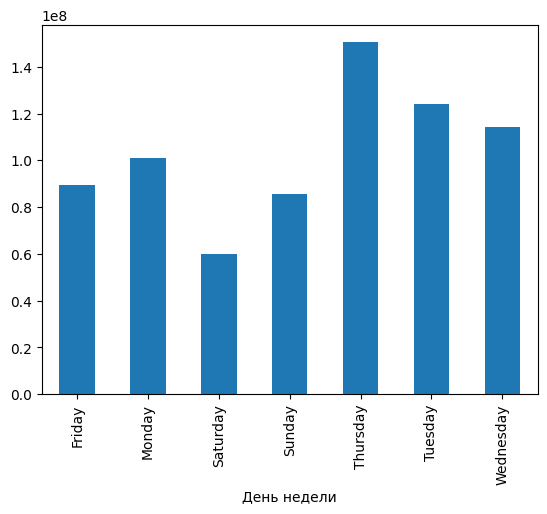

In [ ]:
# Продажи по дням недели
df['День недели'] = df['Дата создания'].dt.day_name()
sales_by_day = df.groupby('День недели')['Итоговая сумма'].sum()
print("Продажи по дням недели:")
print(sales_by_day)

sales_by_day.plot(kind='bar')
plt.show()

In [ ]:
# GMV по категориям
gmv_by_category = df.groupby('Категория')['Итоговая сумма'].sum()
print("GMV по категориям:")
print(gmv_by_category)

GMV по категориям:
Категория
\N                                36772543
Бытовая техника                   97934753
Гипермаркет                       10971331
Дети и младенцы                    8749241
Дом и быт                         20283158
Другое                             5199769
Женская мода                      36405325
Здоровье и спорт                   9896442
Книги                               644076
Компьютерная техника              43589022
Красота и уход                    19791713
Мобильные телефоны и планшеты    304605402
Мужская мода                      42339728
Развлечения                       71215832
Традиционные подарки              15293512
Школа и образование                1692028
Name: Итоговая сумма, dtype: int64


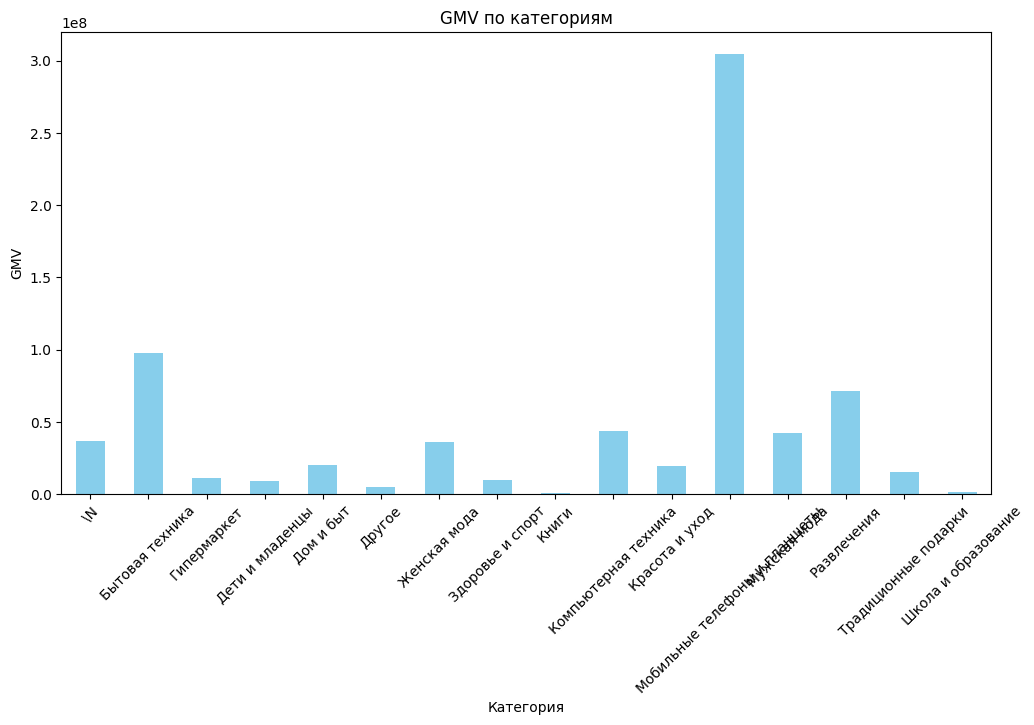

In [ ]:
# Визуализация
plt.figure(figsize=(12,6))
gmv_by_category.plot(kind='bar', color='skyblue')
plt.title('GMV по категориям')
plt.xlabel('Категория')
plt.ylabel('GMV')
plt.xticks(rotation=45)
plt.show()


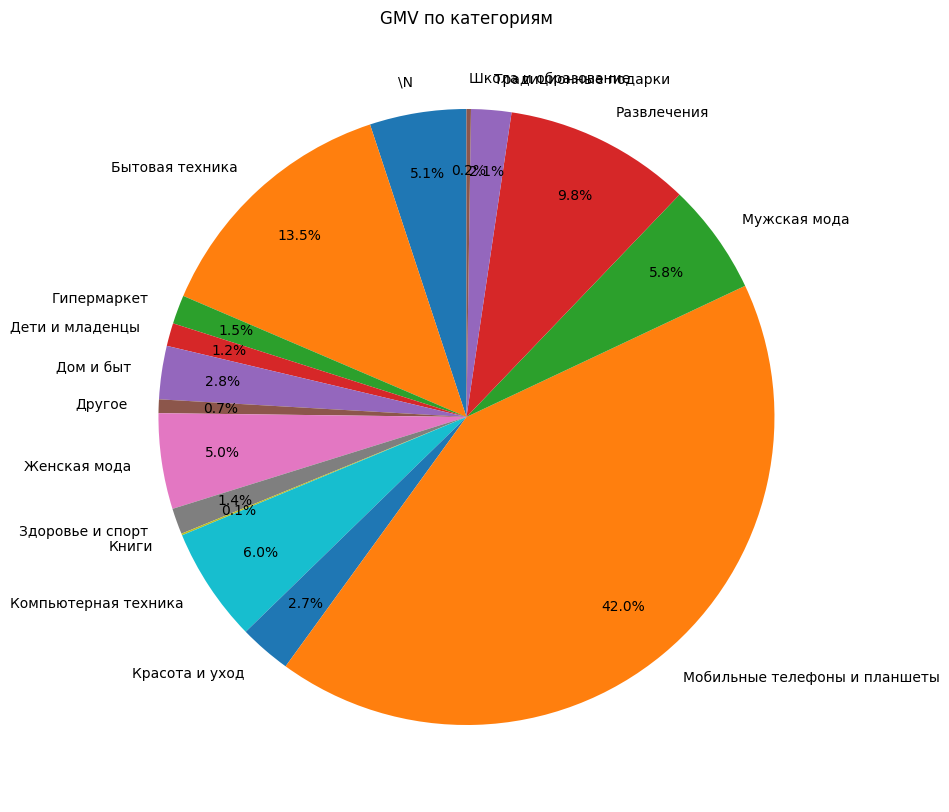

In [ ]:
plt.figure(figsize=(10,10))
gmv_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.8)
plt.title('GMV по категориям')
plt.ylabel('')
plt.show()

# Выводы

1.	Данные охватывают период с2021-07-01 по 2022-01-12
2.	Уникальных клиентов: 30952; Уникальных категорий: 16; Уникальных оплат: 10; Уникальных статусов: 9
3.	Средний чек клиента: 2716 р.
4.	Заказов в статусе завершен 77810, в статусе отменен 41190
5.	Пик продаж пришелся на 2021-11-01 (98 070 888 р.), далее было снижение в 2021-12-01 (27 540 437 р.)
6.	Больше всего продаж приходится на пятницу
7.	Большая часть продаж (30%) приходится на категорию мобильные телефоны и планшеты; на втором месте – бытовая техника и мужская мода – на третьем (14% и 9% соответственно)
8.	Больше всего отмен в категории развлечения (60%)
9.	Больше всего скидок предоставлено на мобильные телефоны и планшеты, бытовая техника и развлечения
10.	Самый продаваемый товар   | Традиционные подарки | 1615 заказов
